In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

%matplotlib inline

df = pd.read_csv(r'C:\Users\Igor\Downloads\NYSE\fundamentals.csv', index_col=0)
df.head()

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [2]:
print("Shape of dataset:", df.shape)
df.info()

Shape of dataset: (1781, 78)
<class 'pandas.core.frame.DataFrame'>
Index: 1781 entries, 0 to 1780
Data columns (total 78 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Ticker Symbol                                        1781 non-null   object 
 1   Period Ending                                        1781 non-null   object 
 2   Accounts Payable                                     1781 non-null   float64
 3   Accounts Receivable                                  1781 non-null   float64
 4   Add'l income/expense items                           1781 non-null   float64
 5   After Tax ROE                                        1781 non-null   float64
 6   Capital Expenditures                                 1781 non-null   float64
 7   Capital Surplus                                      1781 non-null   float64
 8   Cash Ratio                                  

In [3]:
df.describe()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1.781000e+03,1.781000e+03,1.781000e+03,1781.000000,1.781000e+03,1.781000e+03,1482.000000,1.781000e+03,1.781000e+03,1.781000e+03,...,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1608.000000,1562.000000,1.562000e+03
mean,4.673418e+09,-6.353484e+07,6.908940e+07,43.601348,-1.251925e+09,5.351784e+09,74.457490,8.521399e+09,-6.787749e+07,1.608543e+09,...,6.726349e+09,4.699919e+09,1.188846e+10,4.380420e+10,5.569266e+10,2.029154e+10,-3.951522e+09,2013.305348,3.353707,6.024244e+08
std,1.406047e+10,7.562794e+08,6.848143e+08,233.924028,2.979963e+09,1.133977e+10,102.298374,5.432105e+10,3.903369e+08,9.177636e+09,...,1.344800e+10,9.538832e+09,2.584429e+10,1.817039e+11,2.033612e+11,4.095355e+10,1.407047e+10,19.953135,4.695896,1.142585e+09
min,0.000000e+00,-6.452000e+09,-6.768000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,2.100000e+04,-5.562000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,-1.324400e+10,2.577000e+06,2.705000e+06,1.514000e+06,-2.297340e+11,1215.000000,-61.200000,-1.513945e+09
25%,5.160000e+08,-1.040000e+08,-2.638000e+06,10.000000,-1.151200e+09,4.791000e+08,17.000000,3.088000e+08,-5.400000e+07,1.628000e+06,...,1.044178e+09,5.640760e+08,2.201492e+09,3.843300e+09,6.552689e+09,3.714000e+09,-3.040895e+09,2013.000000,1.590000,1.493318e+08
50%,1.334000e+09,-1.830000e+07,2.000000e+06,16.000000,-3.580000e+08,1.997080e+09,41.000000,8.625900e+08,0.000000e+00,7.725000e+06,...,2.747200e+09,1.701500e+09,4.983000e+09,9.141000e+09,1.517000e+10,8.023200e+09,-3.068350e+08,2014.000000,2.810000,2.929409e+08
75%,3.246000e+09,7.816000e+06,3.359200e+07,26.000000,-1.291000e+08,5.735000e+09,90.000000,2.310000e+09,0.000000e+00,2.970000e+08,...,6.162000e+09,4.381000e+09,1.080900e+10,2.389700e+10,3.599710e+10,1.748600e+10,0.000000e+00,2015.000000,4.590000,5.492163e+08
max,2.069390e+11,2.266400e+10,1.416200e+10,5789.000000,5.000000e+06,1.082880e+11,1041.000000,7.281110e+11,3.755000e+09,1.581420e+11,...,1.396600e+11,9.028100e+10,2.562050e+11,2.340547e+12,2.572274e+12,4.856510e+11,0.000000e+00,2016.000000,50.090000,1.610769e+10


In [4]:
missing_values = df.isnull().sum()
print("\nMissing values in each column:\n", missing_values[missing_values > 0])


Missing values in each column:
 Cash Ratio                      299
Current Ratio                   299
Quick Ratio                     299
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
dtype: int64


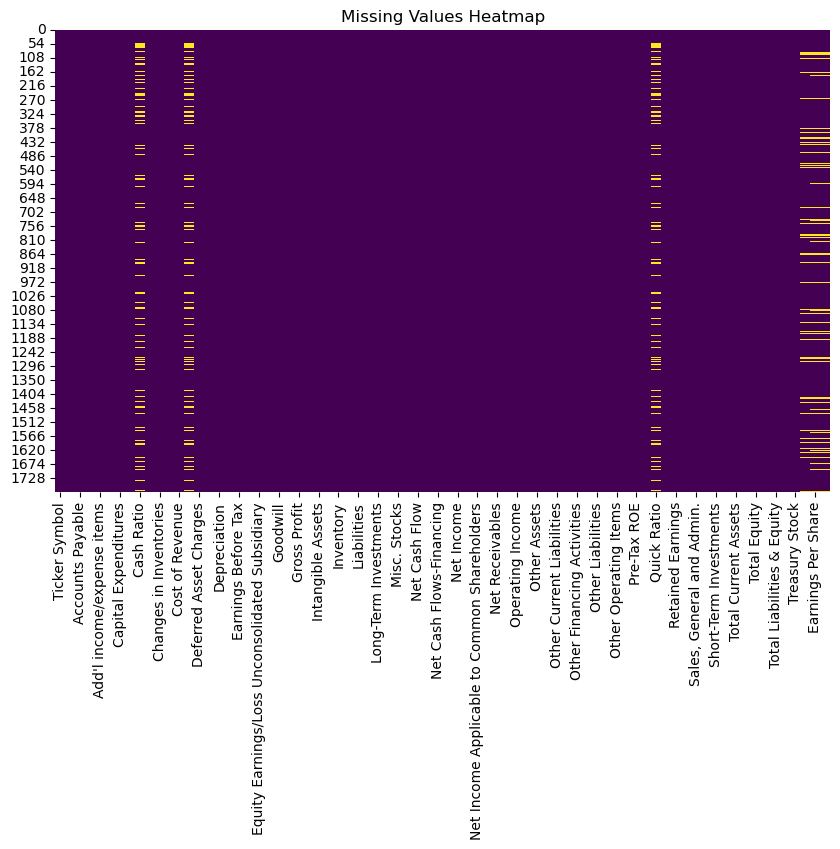

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

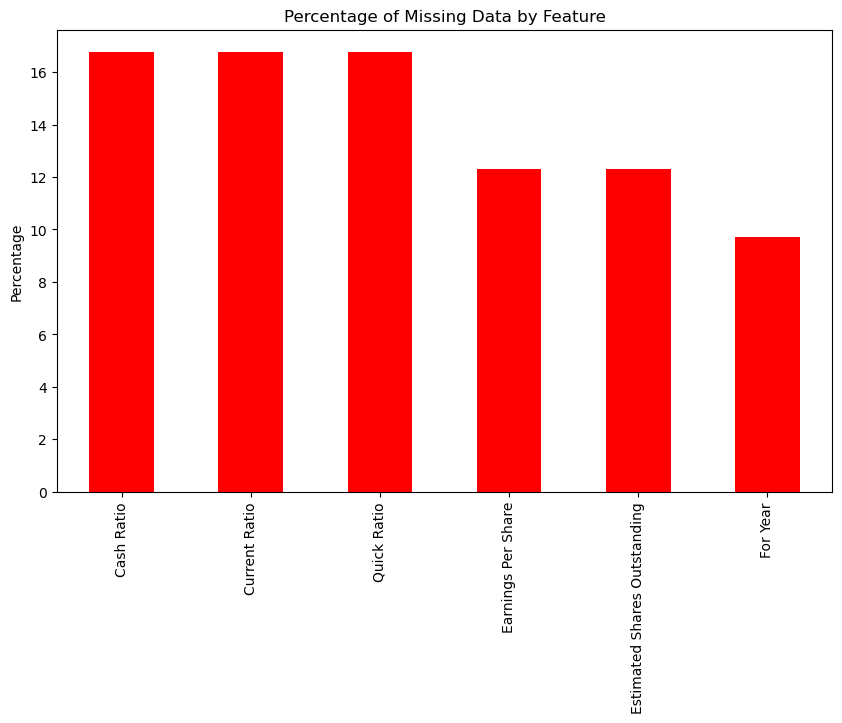

In [6]:
missing_percentage = (df.isnull().sum() / df.shape[0]) * 100
missing_percentage = missing_percentage[missing_percentage > 0]

plt.figure(figsize=(10, 6))
missing_percentage.sort_values(ascending=False).plot(kind='bar', color='red')
plt.title('Percentage of Missing Data by Feature')
plt.ylabel('Percentage')
plt.show()

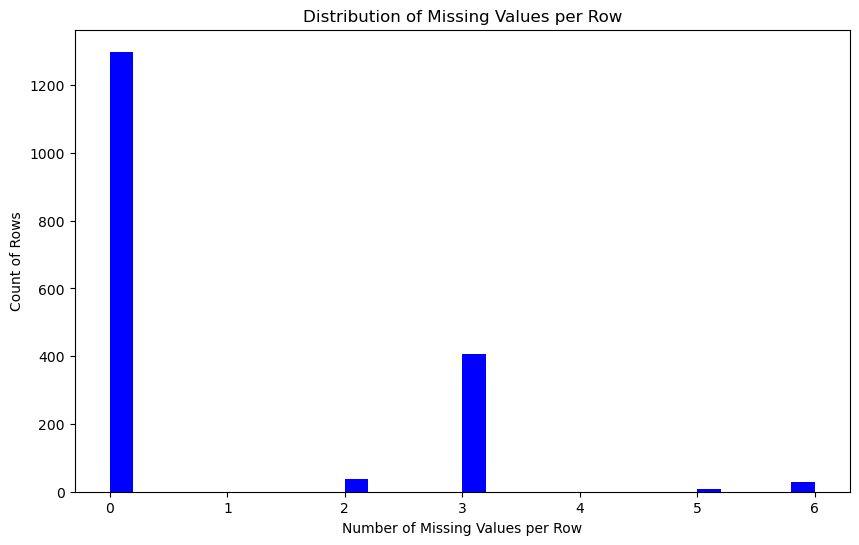

In [7]:
missing_per_row = df.isnull().sum(axis=1)

plt.figure(figsize=(10, 6))
plt.hist(missing_per_row, bins=30, color='blue')
plt.title('Distribution of Missing Values per Row')
plt.xlabel('Number of Missing Values per Row')
plt.ylabel('Count of Rows')
plt.show()

In [8]:
# Remove columns with more than 50% missing values
threshold = 0.5 * df.shape[0]
df_reduced = df.dropna(thresh=threshold, axis=1)

# Impute missing numerical data with the median
for column in df_reduced.columns:
    if df_reduced[column].dtype in ['float64', 'int64']:  # For numeric columns
        df_reduced[column] = df_reduced[column].fillna(df_reduced[column].median())
    elif df_reduced[column].dtype == 'object':  # For categorical columns
        df_reduced[column] = df_reduced[column].fillna(df_reduced[column].mode()[0])

,Accounts Payable,Accounts Receivable,Add'l income/expense items,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,...,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding,Ticker Symbol_AAP
0,3.068000e+09,-222000000.0,-1.961000e+09,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,1.270000e+08,1.049900e+10,...,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08,False
1,4.975000e+09,-93000000.0,-2.723000e+09,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5.000000e+06,1.101900e+10,...,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08,False
2,4.668000e+09,-160000000.0,-1.500000e+08,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7.000000e+06,1.562000e+10,...,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08,False
3,5.102000e+09,352000000.0,-7.080000e+08,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6.000000e+06,1.109600e+10,...,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08,False
4,2.409453e+09,-89482000.0,6.000000e+05,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7.000000e+03,3.106967e+09,...,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,0.000000e+00,0.0,-2.530000e+06,-1.573610e+08,0.000000e+00,41.0,1.576313e+10,0.0,4.766731e+09,4.934400e+07,...,0.000000e+00,7.507519e+09,5.216201e+10,5.966952e+10,2.210591e+09,0.0,2015.0,1.20,2.578925e+08,False
1777,1.381000e+09,-99000000.0,9.000000e+06,-1.840000e+08,8.780000e+08,43.0,6.100000e+08,-178000000.0,5.000000e+06,1.669000e+09,...,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.0,2013.0,1.01,4.990099e+08,False
1778,1.071000e+09,69000000.0,-7.000000e+06,-1.800000e+08,9.580000e+08,81.0,8.820000e+08,-110000000.0,5.000000e+06,1.717000e+09,...,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.0,2014.0,1.16,5.025862e+08,False
1779,1.313000e+09,-58000000.0,-8.100000e+07,-2.240000e+08,1.012000e+09,65.0,1.154000e+09,-262000000.0,5.000000e+06,1.738000e+09,...,1.781000e+09,1.068000e+09,6.845000e+09,7.913000e+09,4.765000e+09,-203000000.0,2015.0,0.68,4.985294e+08,False


In [29]:
y = df_reduced['After Tax ROE']
X_numeric = df_reduced.select_dtypes(include=[np.number]).drop(columns=['After Tax ROE'])  # Keep numeric columns excluding the target 'ROE'
X_categorical = df_reduced.select_dtypes(include=['object'])  # Keep only categorical columns
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True) # One-Hot Encode the categorical columns
X = pd.concat([X_numeric, X_categorical_encoded], axis=1) # Combine numeric columns with the one-hot encoded categorical columns
X = sm.add_constant(X.iloc[:, :75])

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get p-values and sort them
p_values = model.pvalues[1:]  # Exclude the intercept
top_15_features = p_values.nsmallest(15)

top_15_features.index

Index(['Pre-Tax ROE', 'Profit Margin', 'Pre-Tax Margin', 'Misc. Stocks',
       'Changes in Inventories', 'Inventory', 'Other Financing Activities',
       'Current Ratio', 'Gross Margin', 'Income Tax', 'Minority Interest',
       'Net Income', 'Net Income Applicable to Common Shareholders',
       'Operating Margin', 'Equity Earnings/Loss Unconsolidated Subsidiary'],
      dtype='object')

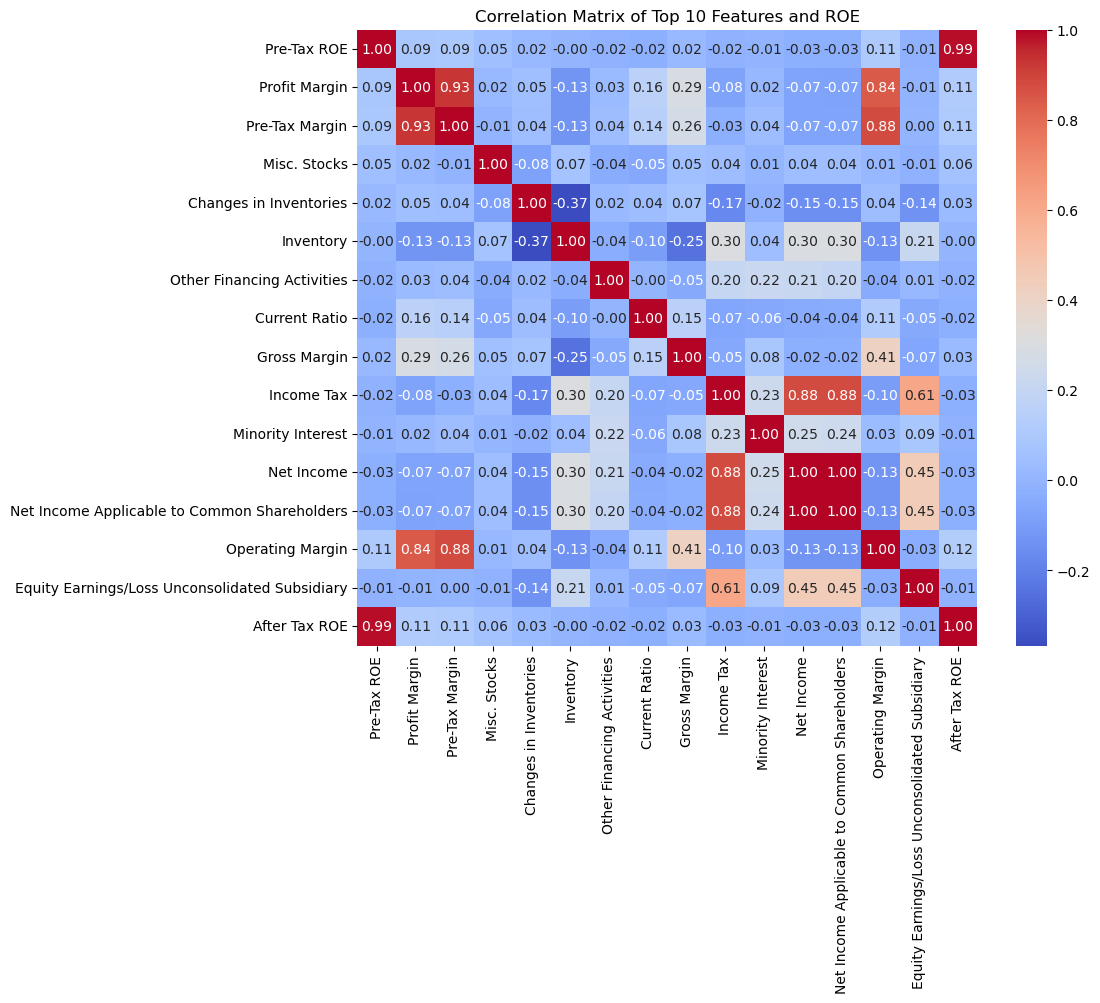

In [30]:
top_15_features_with_roe = list(top_15_features.index) + ['After Tax ROE']
df_top_15 = df[top_15_features_with_roe]

plt.figure(figsize=(10, 8))
correlation_matrix = df_top_15.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Top 10 Features and ROE")
plt.show()